In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()
'''
while True:
    data = pd.read_csv("output.csv")
    
    left_motor = data['left motor'].values
    left_motor_norm = left_motor / 1000
    right_motor = data['right motor'].values
    right_motor_norm = right_motor / 1000
    total_motor_norm = (left_motor+right_motor) / 1000
    
    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    total_sensor = left_sensor + right_sensor
    
    left_us_sensor = data['left ultrasound sensor'].values
    right_us_sensor = data['right ultrasound sensor'].values
    
    print(data)
    #print(total_motor)
    sensor = data['left sensor'].values + data['right sensor'].values
    clear_output(wait=True)
    #plt.plot(total_motor)
    #plt.plot(left_motor_norm)
    #plt.plot(right_motor_norm)
    plt.plot(left_sensor)
    plt.plot(right_sensor)
    #plt.plot(right_motor_norm)
    plt.axis('tight')
    #plt.plot(data['right motor'])
    #xplot = np.arange(0, data.shape[0]/20, 0.05)
    #plt.plot(xplot, lm, label='left-motor')
    #plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    plt.legend(['left_motor_norm','right_motor_norm','left_sensor','right_sensor','left motor','right motor'])
    plt.pause(1)

while True:
    clear_output()
    plt.pause(1)
'''
clear_output()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
#while True:
plt.figure(figsize=(10,10))
data = pd.read_csv("output.csv")

data['right motor'] = data['right motor'].values/1000
data['left motor'] = data['left motor'].values/1000

left_motor = data['left motor'].values
left_motor_norm = left_motor / 1000
right_motor = data['right motor'].values
right_motor_norm = right_motor / 1000
total_motor_norm = (left_motor+right_motor) / 1000
#print(right_motor_norm)

left_sensor = data['left sensor'].values
right_sensor = data['right sensor'].values
total_sensor = left_sensor + right_sensor
#print(left_sensor)

left_us_sensor = data['left ultrasound sensor'].values
right_us_sensor = data['right ultrasound sensor'].values
#print(left_us_sensor)

#print(data)
clear_output(wait=True)
im = plt.imshow(data,cmap='hot',aspect='auto')
plt.colorbar(im,orientation='horizontal')
plt.pause(1)

'''
while True:
    clear_output(wait=True)
    plt.pause(1)
'''
#clear_output()

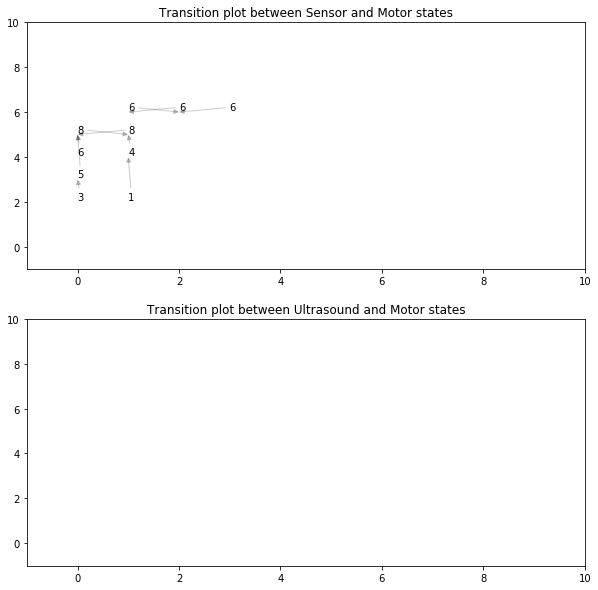

In [ ]:
from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
from IPython.display import clear_output

plt.ion()
np.set_printoptions(threshold=np.nan,suppress=True)
while True:
    grid = plt.figure(figsize=(10,10))
    ls = grid.add_subplot(211)
    plt.title("Transition plot between Sensor and Motor states")
    rs = grid.add_subplot(212)
    plt.title("Transition plot between Ultrasound and Motor states")
    
    data = DataManipulation()
    NUM_OF_BINS = data.get_NUM_OF_BINS()
    data.normalized_motor()
    motor_values,sensor_values,us_values = data.normalized_0_to_1()
    
    sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    
    xArray,yArray = data.digitize_total_values(most_visited_state, type='2d')
    
    for i in range(0,len(xArray)-1,3):
        test = ls.annotate(
            str(most_visited_state[i+2]),
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left',
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.2)
        )
        
    
    us_and_motor = data.convert_values_to_bins(us_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    xArray,yArray,zArray = data.digitize_total_values(most_visited_state, type='3d')

    for i in range(0,len(xArray)-1,3):
        test = rs.annotate(
            str(most_visited_state[i+2]),
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left',
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.2)
        )
    
    ls.set_xlim(-1,NUM_OF_BINS)
    ls.set_ylim(-1,NUM_OF_BINS)
    rs.set_xlim(-1,NUM_OF_BINS)
    rs.set_ylim(-1,NUM_OF_BINS)
    
    clear_output(wait=True)
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd


'''
plt.ion()

#grid.canvas.draw()
'''
while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05)
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultraviolet sensor'].values
    ruvv = data['right ultraviolet sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
    #plt.plot(xplot, lm, label='left-motor')
    #plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    
    
while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
#print(total)

plt.ion()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

mpl.style.use('default')
#ax.plot(xArray, yArray, zArray, label='line plot')
#ax.scatter(xArray, yArray,zArray, label='scatter plot')

data = pd.read_csv("output.csv")
data['right motor'] = data['right motor'].values/1000 #min -1 max 1
data['left motor'] = data['left motor'].values/1000 #min -1 max 1
NUM_OF_BINS = 10
#making -1 scale to 0. normalized to 0-1 rather than -1 till 1
total_motor = (0.5*((data['left motor'].values + data['right motor'].values)/2) + 0.5) * NUM_OF_BINS
#scale 0 to 1
total_sensor = ((data['left sensor'].values + data['right sensor'].values) / 2)  * NUM_OF_BINS
#scale 0 to 1
total_us = ((data['left ultrasound sensor'].values + data['right ultrasound sensor'].values) / 2)  * NUM_OF_BINS

for i in range(len(total_motor)):
    if total_motor[i] == 10:
        total_motor[i] = 9
    if total_sensor[i] == 10:
        total_sensor[i] == 9
    if total_motor[i] == 10:
        total_motor[i] == 9
total_motor = np.floor(total_motor).astype(int)
total_sensor = np.floor(total_sensor).astype(int)
total_us = np.floor(total_us).astype(int)
total = total_sensor + NUM_OF_BINS * total_motor + (NUM_OF_BINS**2) * total_us
total = np.floor(total).astype(int)

'''
This is excluding where a state goes to itself.
'''
newlist=[]
newlist.append(total[0])
for i in range(1,len(total)-1):
    if total[i] == total[i-1]:
        continue
    else:
        newlist.append(total[i])
newlist = np.array(newlist)

'''
This detects how many times a state goes to another state
'''
#print(newlist)
dictionary = {}
for i in range(len(newlist)-1):
    if newlist[i] == newlist[i+1]:
        continue
    if newlist[i] not in dictionary:
        dictionary[newlist[i]] = {}
        dictionary[newlist[i]][newlist[i+1]] = 1
    elif newlist[i+1] in dictionary[newlist[i]]:
        dictionary[newlist[i]][newlist[i+1]] += 1
    elif newlist[i+1] not in dictionary[newlist[i]]:
        dictionary[newlist[i]][newlist[i+1]] = 1

'''
This is to make a new list where every 3 values indicate source, destination, and frequency visited.
'''
#print(dictionary)
newerlist = []
for i,j in dictionary.items():
    newerlist.append(i)
    newerlist.append(sorted(j.items(),key=lambda t: t[1], reverse=True)[0][0])
    newerlist.append(sorted(j.items(),key=lambda t: t[1], reverse=True)[0][1])

newerlist = np.array(newerlist)
#print(newerlist)

firstArray = np.array([0,1,2,3,4,5,6,7,8,9])
secondArray = np.array([0,10,20,30,40,50,60,70,80,90])
thirdArray = np.array([0,100,200,300,400,500,600,700,800,900])
xArray = np.digitize(newerlist%10,firstArray)
xArray -= 1
#motor
yArray = np.digitize(newerlist%100,secondArray)
yArray -= 1 #numpy digitize assigns bin from 1 to 10.  but we use 0 to 9
#ultrasound
zArray = np.digitize(newerlist,thirdArray)
zArray -= 1
#print(np.polynomial.polynomial.polyvander3d(xArray,yArray,zArray,[1,1,1]))
#print(xArray,yArray,zArray)

sc = ax.quiver(xArray[:-1:3], yArray[:-1:3], zArray[:-1:3], 
        xArray[1::3]-xArray[:-1:3],yArray[1::3]-yArray[:-1:3],zArray[1::3]-zArray[:-1:3],
        normalize=True,cmap=plt.cm.RdYlBu)

# taken from https://stackoverflow.com/questions/2298390/fitting-a-line-in-3d
data2 = np.concatenate((xArray.astype(float)[:, np.newaxis], 
                       yArray.astype(float)[:, np.newaxis], 
                       zArray.astype(float)[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data2 += np.random.normal(size=data2.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data2.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data2 - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean
#ax.plot3D(*linepts.T)
ax.set_xlabel('Sensor')
ax.set_ylabel('Motor')
ax.set_zlabel('Ultrasound')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_title("3d normalized values between sensor, motor, and ultrasound")
ax.legend()

plt.show()


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import itertools

plt.ion()



#ax.plot(data['left motor'],data['right motor'],data['left sensor'])
while True:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    data = pd.read_csv("output.csv")
    ax.plot(data['left motor'],data['right motor'])
    #plt.draw()
    clear_output(wait=True)
    plt.pause(1)
    